In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

# LAB2

## STEP 1

In [2]:
df = pd.read_csv('Documentation/lab2_data.csv', )
df

,Vehicle_ID,Vehicle_type,Time,Cumulative_distance
0,1,Motorcycle,0.0,0.000
1,1,Motorcycle,0.4,0.000
2,1,Motorcycle,0.8,0.000
3,1,Motorcycle,1.2,0.000
4,1,Motorcycle,1.6,0.000
...,...,...,...,...
580205,2476,Car,952.8,11.846
580206,2477,Car,951.6,0.000
580207,2477,Car,952.0,3.387
580208,2477,Car,952.4,6.944


c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

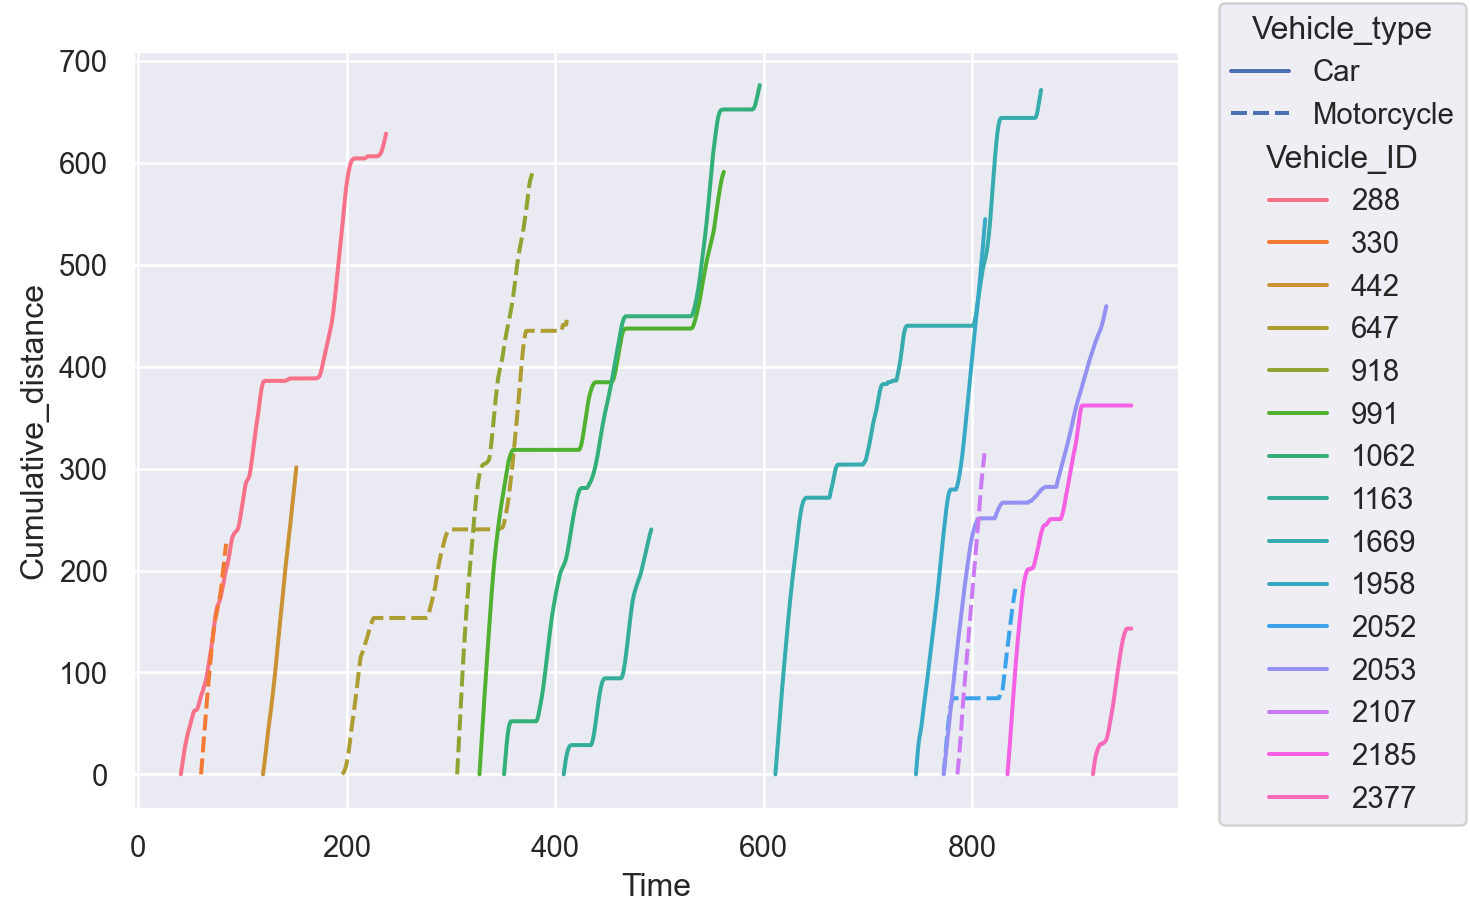

In [3]:
sample = np.random.choice(df.Vehicle_ID.unique(),15)
(
    so.Plot(df.loc[df.Vehicle_ID.isin(sample)], x="Time", y="Cumulative_distance", linestyle="Vehicle_type", color="Vehicle_ID")
    .add(so.Line())
    .scale(color=so.Nominal())
    .plot()
)

In [27]:
#Create distance, speed and acceleration in function of time
df["distance"] = df.groupby("Vehicle_ID")["Cumulative_distance"].diff()
df["dt"] = df.groupby("Vehicle_ID")["Time"].diff()
df["speed"] = df.distance / df.dt
df["acceleration"] = df.speed.diff() / df.dt

df

,Vehicle_ID,Vehicle_type,Time,Cumulative_distance,distance,dt,speed,acceleration,mode
0,1,Motorcycle,0.0,0.000,NaN,NaN,NaN,NaN,IDLE
1,1,Motorcycle,0.4,0.000,0.000,0.4,0.0000,NaN,CRUISE
2,1,Motorcycle,0.8,0.000,0.000,0.4,0.0000,0.00000,CRUISE
3,1,Motorcycle,1.2,0.000,0.000,0.4,0.0000,0.00000,CRUISE
4,1,Motorcycle,1.6,0.000,0.000,0.4,0.0000,0.00000,CRUISE
...,...,...,...,...,...,...,...,...,...
580205,2476,Car,952.8,11.846,2.524,0.4,6.3100,-2.85625,ACC
580206,2477,Car,951.6,0.000,NaN,NaN,NaN,NaN,IDLE
580207,2477,Car,952.0,3.387,3.387,0.4,8.4675,NaN,ACC
580208,2477,Car,952.4,6.944,3.557,0.4,8.8925,1.06250,ACC


In [32]:
df["mode"] = "IDLE"
df.loc[df.acceleration > 0.5, "mode"] = "ACC"
df.loc[df.acceleration < -0.5, "mode"] = "DEC"
df.loc[(df.speed > 0.28) * (abs(df.acceleration)<=0.5), "mode"] = "CRUISE"

display(df)
df["mode"].value_counts()

,Vehicle_ID,Vehicle_type,Time,Cumulative_distance,distance,dt,speed,acceleration,mode
0,1,Motorcycle,0.0,0.000,NaN,NaN,NaN,NaN,IDLE
1,1,Motorcycle,0.4,0.000,0.000,0.4,0.0000,NaN,IDLE
2,1,Motorcycle,0.8,0.000,0.000,0.4,0.0000,0.00000,IDLE
3,1,Motorcycle,1.2,0.000,0.000,0.4,0.0000,0.00000,IDLE
4,1,Motorcycle,1.6,0.000,0.000,0.4,0.0000,0.00000,IDLE
...,...,...,...,...,...,...,...,...,...
580205,2476,Car,952.8,11.846,2.524,0.4,6.3100,-2.85625,DEC
580206,2477,Car,951.6,0.000,NaN,NaN,NaN,NaN,IDLE
580207,2477,Car,952.0,3.387,3.387,0.4,8.4675,NaN,IDLE
580208,2477,Car,952.4,6.944,3.557,0.4,8.8925,1.06250,ACC


mode
IDLE      229424
DEC       120584
CRUISE    118130
ACC       112072
Name: count, dtype: int64

c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

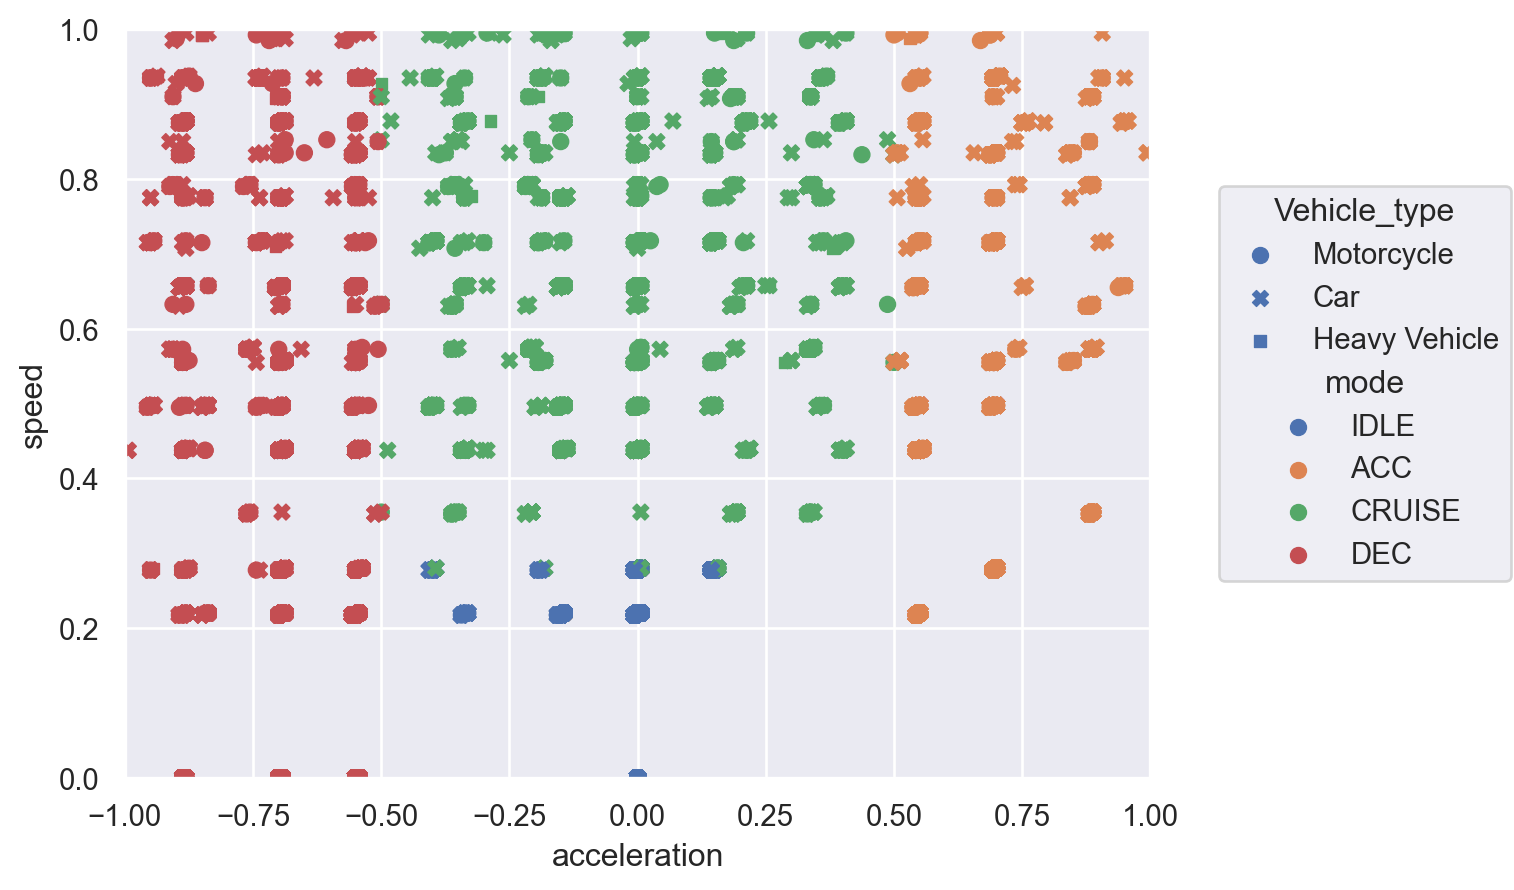

In [33]:
(
    so.Plot(df, x="acceleration", y="speed", marker="Vehicle_type", color="mode")
    .add(so.Dot())
    .scale(color=so.Nominal())
    .limit(x=(-1,1), y=(0,1))
    .plot()
)

In [34]:
display(df)

,Vehicle_ID,Vehicle_type,Time,Cumulative_distance,distance,dt,speed,acceleration,mode
0,1,Motorcycle,0.0,0.000,NaN,NaN,NaN,NaN,IDLE
1,1,Motorcycle,0.4,0.000,0.000,0.4,0.0000,NaN,IDLE
2,1,Motorcycle,0.8,0.000,0.000,0.4,0.0000,0.00000,IDLE
3,1,Motorcycle,1.2,0.000,0.000,0.4,0.0000,0.00000,IDLE
4,1,Motorcycle,1.6,0.000,0.000,0.4,0.0000,0.00000,IDLE
...,...,...,...,...,...,...,...,...,...
580205,2476,Car,952.8,11.846,2.524,0.4,6.3100,-2.85625,DEC
580206,2477,Car,951.6,0.000,NaN,NaN,NaN,NaN,IDLE
580207,2477,Car,952.0,3.387,3.387,0.4,8.4675,NaN,IDLE
580208,2477,Car,952.4,6.944,3.557,0.4,8.8925,1.06250,ACC


c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

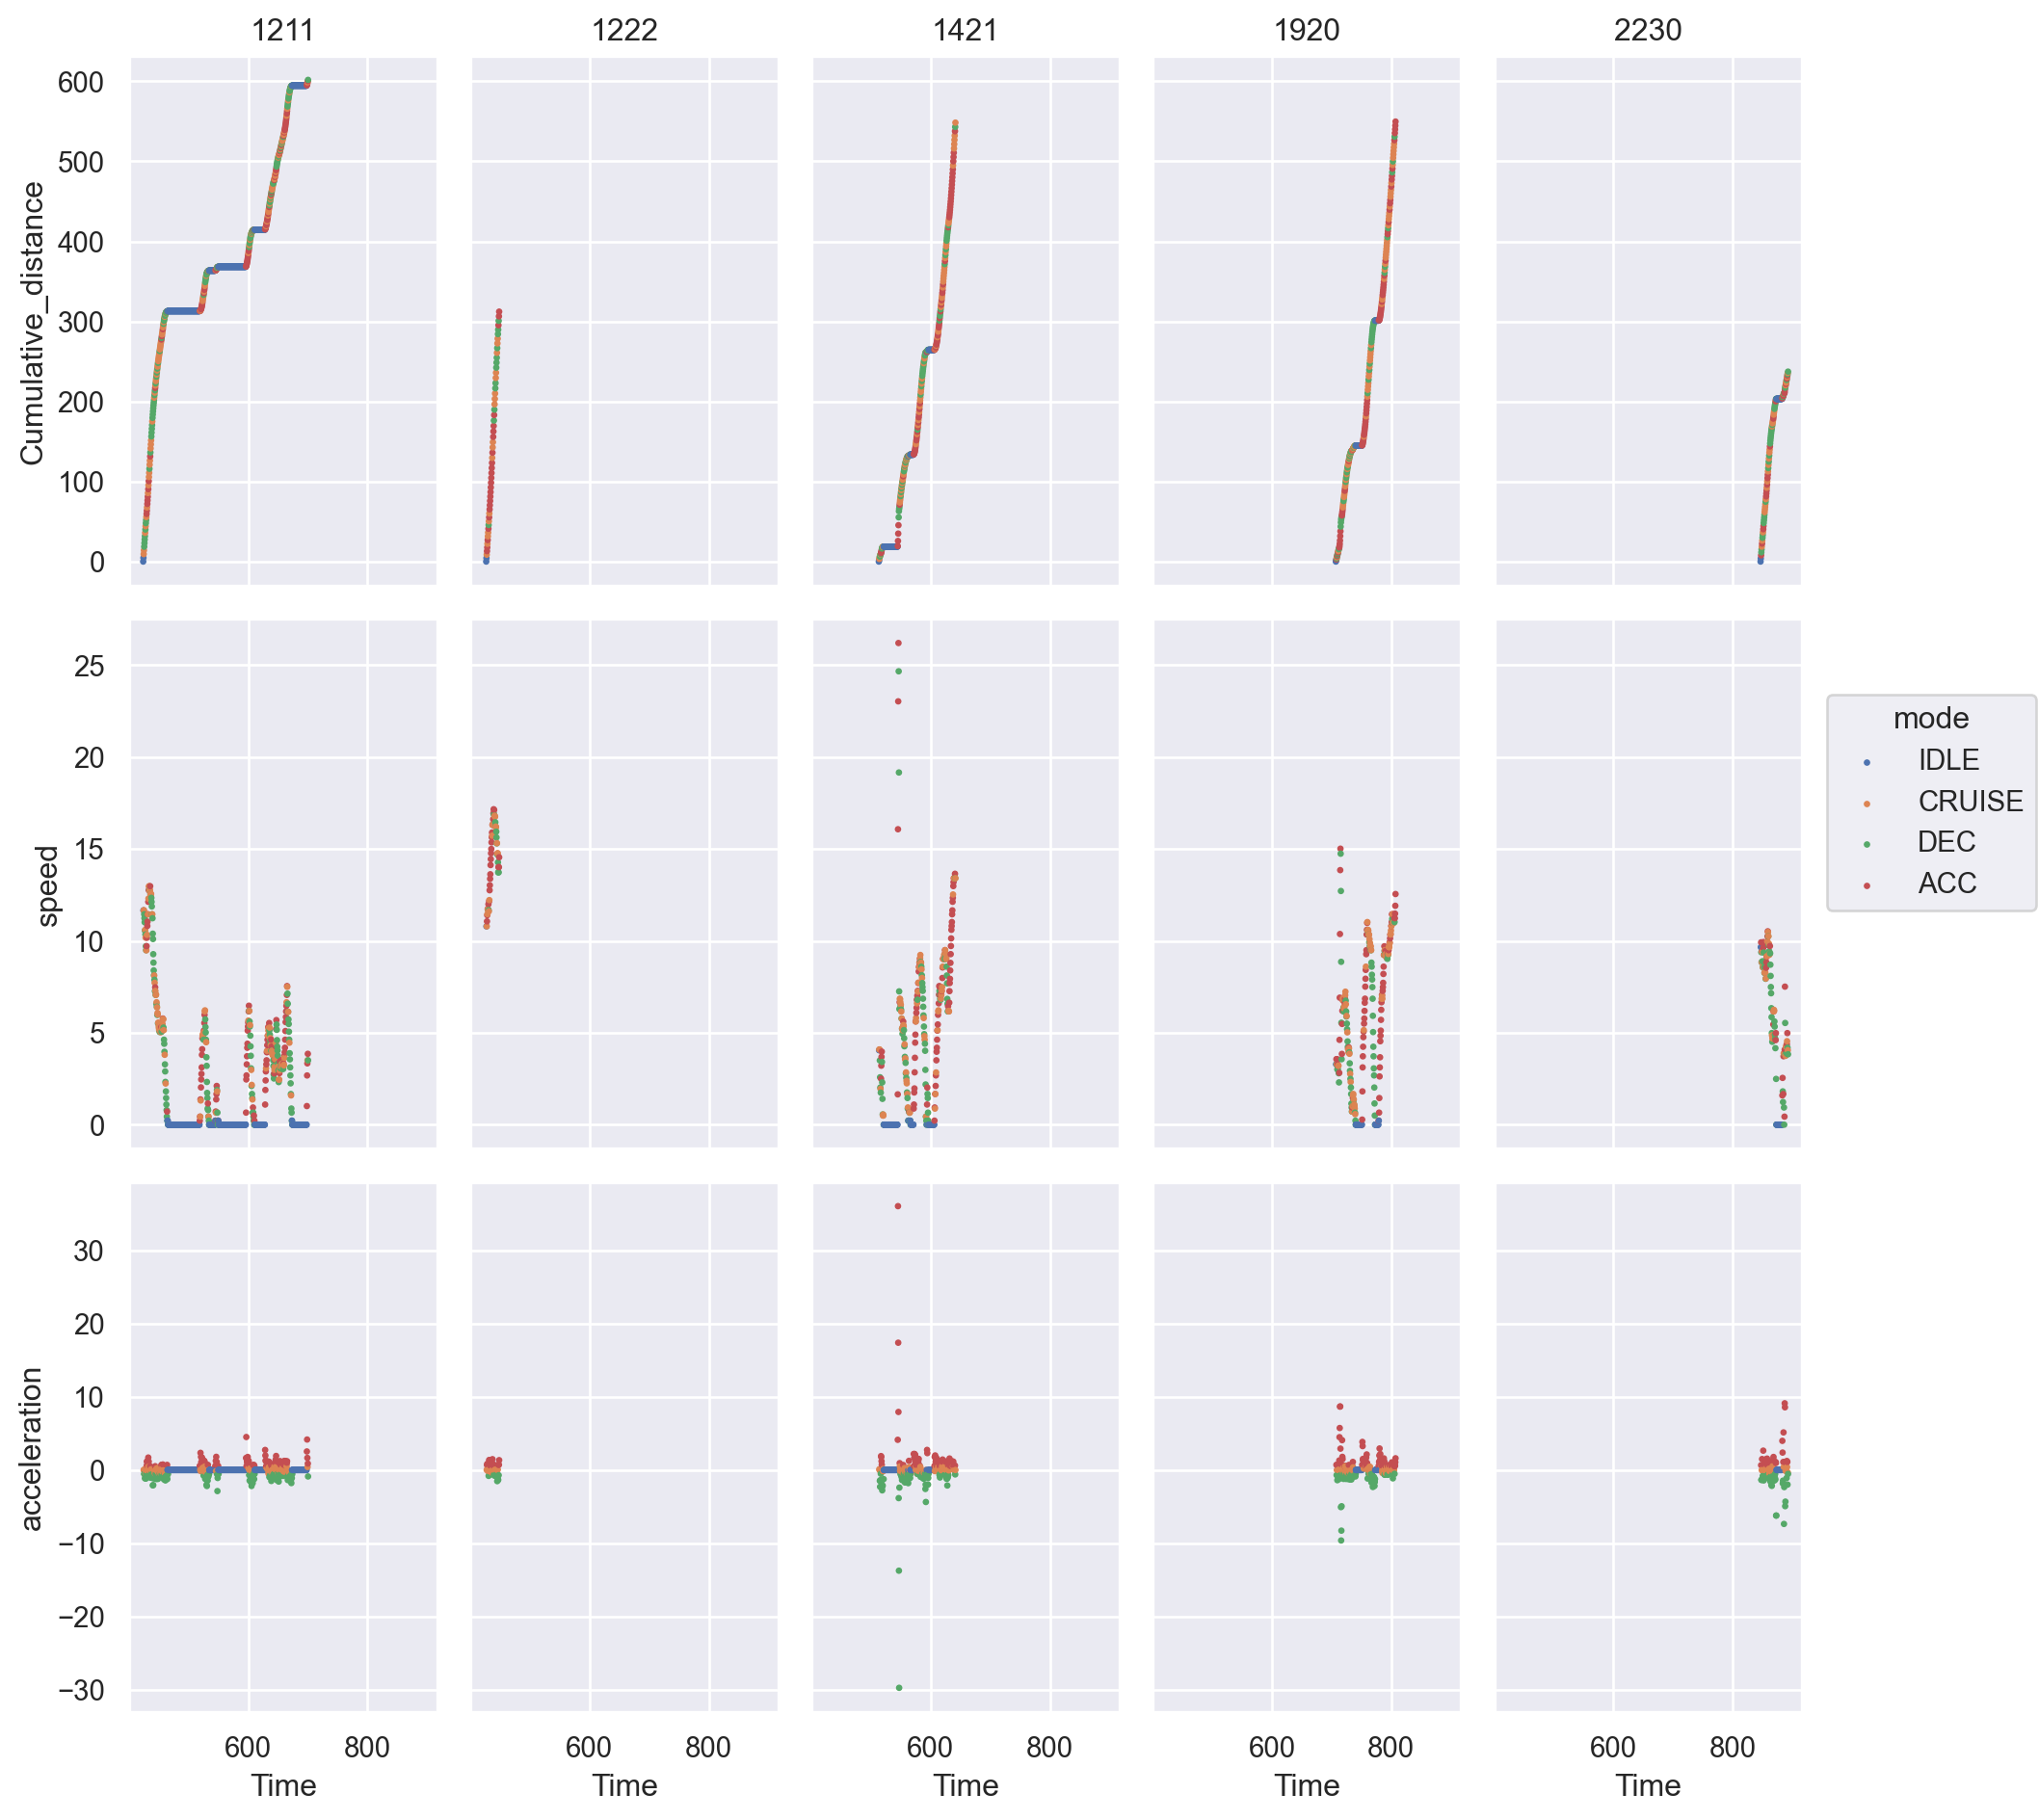

In [48]:
sample = np.random.choice(df.Vehicle_ID.unique(),5)
(
    so.Plot(df.loc[df.Vehicle_ID.isin(sample)], x="Time", color="mode")
    .pair(y=["Cumulative_distance", "speed", "acceleration"])
    .facet(col="Vehicle_ID")
    .add(so.Dot(pointsize=2), so.Dodge())
    .scale(color=so.Nominal())
    .layout(size=(10,10))
    .plot()
)